In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.DataFrame({'x':[12,20,28,18,29,33,24,45,45,52,51,52,55,53,55,61,64,69,72],
                'y':[39,36,30,52,54,46,55,59,63,70,66,63,58,23,14,8,19,7,24]})


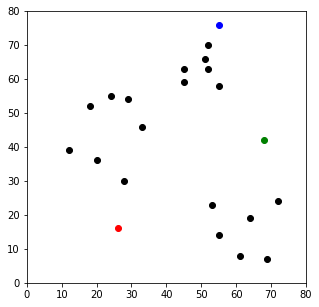

In [2]:
np.random.seed(200)
k=3
centroids={
    i+1:[np.random.randint(0,80),np.random.randint(0,80)]
    for i in range(k)
}
fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color='k')
colmap={1:'r',2:'g',3:'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()


    x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0  12  39        26.925824        56.080300        56.727418        1     r
1  20  36        20.880613        48.373546        53.150729        1     r
2  28  30        14.142136        41.761226        53.338541        1     r
3  18  52        36.878178        50.990195        44.102154        1     r
4  29  54        38.118237        40.804412        34.058773        3     b


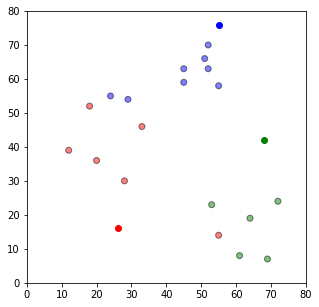

In [3]:
def assignment(df,centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)]=(
        np.sqrt(
            (df['x']-centroids[i][0])**2
            +(df['y']-centroids[i][1])**2
              )
        )
    centroid_distance_cols=['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest']=df.loc[:,centroid_distance_cols].idxmin(axis=1)
    df['closest']=df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color']=df['closest'].map(lambda x:colmap[x])
    return df
df=assignment(df,centroids)
print(df.head())

fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.DataFrame({'x':[12,20,28,18,29,33,24,45,45,52,51,52,55,53,55,61,64,69,72],
                'y':[39,36,30,52,54,46,55,59,63,70,66,63,58,23,14,8,19,7,24]})


In [5]:
from sklearn.cluster import KMeans



In [6]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
labels=kmeans.predict(df)
centroids=kmeans.cluster_centers_